**Nama**            : Fawwaz Rif'at Revista

**NIU**             : 565782

**Mata Kuliah**     : Pengolahan dan Analisis Citra Digital

**Tugas**           : Assignment 02 (Spatial Filtering)

In [1]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import numpy as np

# Fungsi konvolusi untuk filtering dan sharpening
def convolution_image(image, kernel):
    kernel = np.flipud(np.fliplr(kernel))
    if image.ndim == 2:  # Untuk grayscale
        return convolution_gray(image, kernel)
    elif image.ndim == 3:  # Untuk RGB
        return convolution_rgb(image, kernel)
    else:
        raise ValueError("Image harus 2D (grayscale) atau 3D (RGB)")

# Fungsi konvolusi grayscale
def convolution_gray(image, kernel):
    h, w = image.shape
    k_h, k_w = kernel.shape
    pad_h, pad_w = k_h // 2, k_w // 2
    padded = np.pad(image, ((pad_h, pad_h), (pad_w, pad_w)), mode="constant")
    output = np.zeros((h,w))

    for i in range(h):
        for j in range(w):
            region = padded[i:i+k_h, j:j+k_w]
            output[i,j] = np.sum(region * kernel)
    return np.clip(output, 0, 255).astype(np.uint8) # Memastikan nilai intesitasnya tetap di range yang tepat/ sama

# Fungsi konvolusi RGB
def convolution_rgb(image, kernel):
    h, w, c = image.shape
    k_h, k_w = kernel.shape
    pad_h, pad_w = k_h // 2, k_w // 2
    padded = np.pad(image, ((pad_h,pad_h),(pad_w,pad_w),(0,0)), mode="constant")
    output = np.zeros((h,w,c))

    for ch in range(c):
        for i in range(h):
            for j in range(w):
                region = padded[i:i+k_h, j:j+k_w, ch]
                output[i,j,ch] = np.sum(region * kernel)
    return np.clip(output,0,255).astype(np.uint8) # Memastikan nilai intesitasnya tetap di range yang tepat/ sama

# Fungsi sharpening dengan Laplacian
def laplacian_sharpen(image, kernel, k):
    lap = convolution_image(image, kernel).astype(np.float32)
    sharpened = image.astype(np.float32) - k * lap
    return np.clip(sharpened, 0, 255).astype(np.uint8)


# Kernel untuk konvolusi filtering dan sharpening
mean_kernel = np.ones((3,3)) / 9
gaussian_kernel = np.array([[1, 2, 1],
                            [2, 4, 2],
                            [1, 2, 1]]) / 16
sobelx_kernel = np.array([[-1, 0, 1],
                          [-2, 0, 2],
                          [-1, 0, 1]])
sobely_kernel = np.array([[-1, -2, -1],
                          [ 0,  0,  0],
                          [ 1,  2,  1]])
sharpen_kernel = np.array([ [ 0, -1,  0],
                            [-1,  5, -1],
                            [ 0, -1,  0]])
laplacian_kernel = np.array([ [0, 1, 0],
                              [1, -4, 1],
                              [0, 1, 0]])

In [2]:
# Load gambar grayscale
img_gray = Image.open('./town.jpg')
img_gray = np.array(img_gray)
img_gray = convolution_image(img_gray, mean_kernel)

# Menerapkan jenis filtering
mean_gray       = convolution_image(img_gray, mean_kernel)
gaussian_gray   = convolution_image(img_gray, gaussian_kernel)
sobelx_gray     = convolution_image(img_gray, sobelx_kernel)
sobely_gray     = convolution_image(img_gray, sobely_kernel)
sharpened_gray  = convolution_image(img_gray, sharpen_kernel)
laplacian_gray  = laplacian_sharpen(img_gray, laplacian_kernel, )

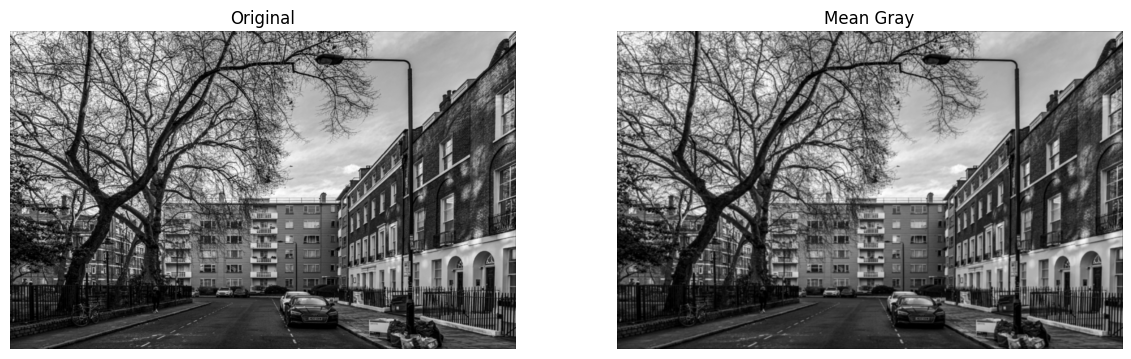

In [3]:
# Mean filtering grayscale
plt.figure(figsize=(30,15))
plt.subplot(1,4,1); plt.imshow(img_gray, cmap="gray"); plt.title("Original"); plt.axis("off")
plt.subplot(1,4,2); plt.imshow(mean_gray, cmap="gray"); plt.title("Mean Gray"); plt.axis("off")
plt.show()

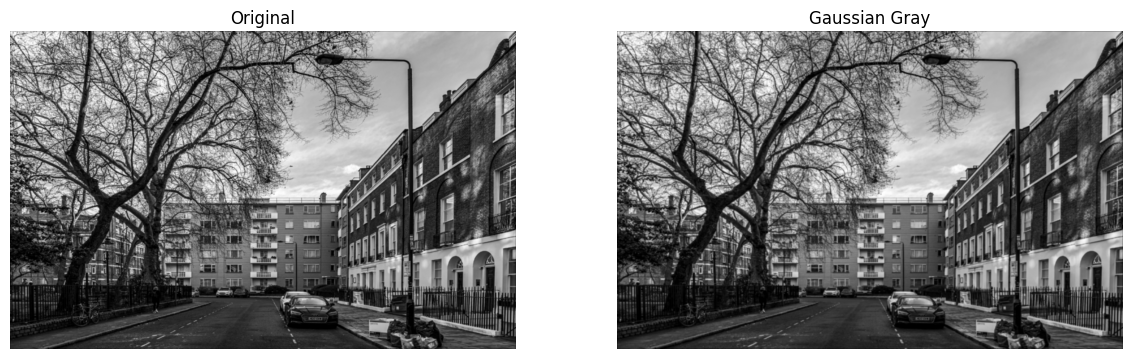

In [4]:
# Gaussian filtering grayscale
plt.figure(figsize=(30,15))
plt.subplot(1,4,1); plt.imshow(img_gray, cmap="gray"); plt.title("Original"); plt.axis("off")
plt.subplot(1,4,2); plt.imshow(gaussian_gray, cmap="gray"); plt.title("Gaussian Gray"); plt.axis("off")
plt.show()

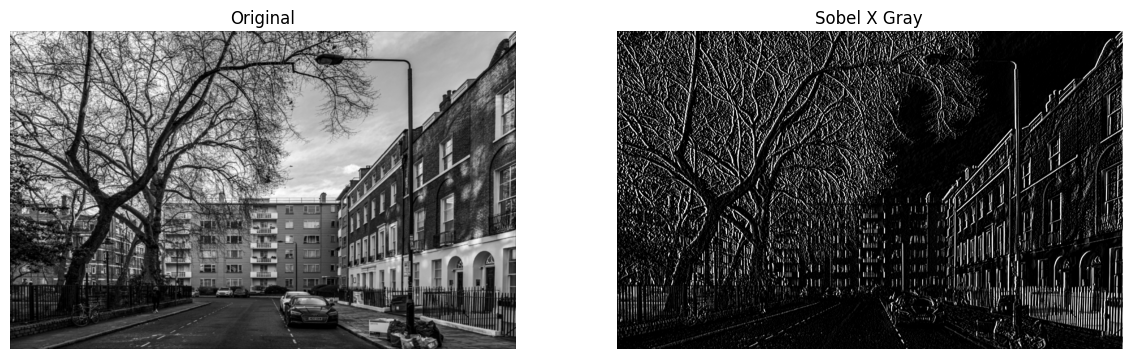

In [5]:
# Sobel X filtering grayscale
plt.figure(figsize=(30,15))
plt.subplot(1,4,1); plt.imshow(img_gray, cmap="gray"); plt.title("Original"); plt.axis("off")
plt.subplot(1,4,2); plt.imshow(sobelx_gray, cmap="gray"); plt.title("Sobel X Gray"); plt.axis("off")
plt.show()

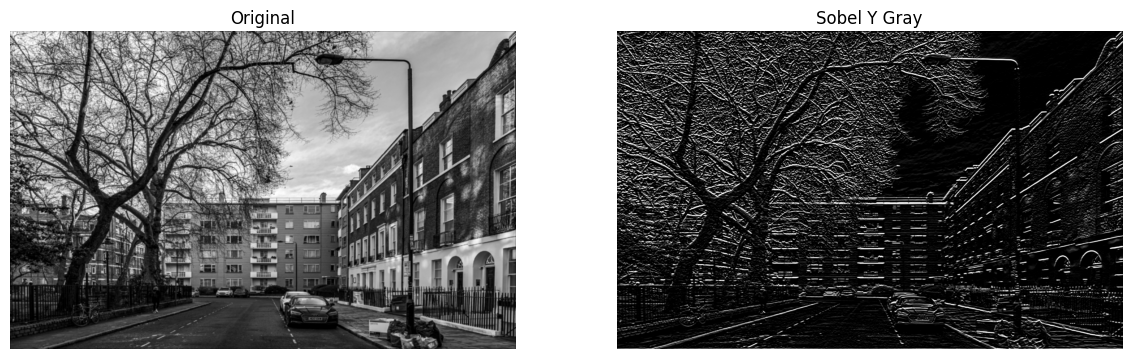

In [6]:
# Sobel Y filtering grayscale
plt.figure(figsize=(30,15))
plt.subplot(1,4,1); plt.imshow(img_gray, cmap="gray"); plt.title("Original"); plt.axis("off")
plt.subplot(1,4,2); plt.imshow(sobely_gray, cmap="gray"); plt.title("Sobel Y Gray"); plt.axis("off")
plt.show()

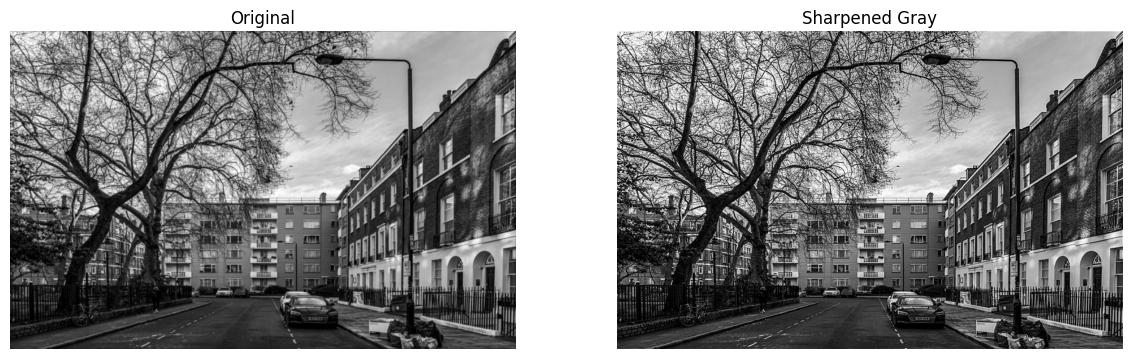

In [7]:
# Sharpening grayscale
plt.figure(figsize=(30,15))
plt.subplot(1,4,1); plt.imshow(img_gray, cmap="gray"); plt.title("Original"); plt.axis("off")
plt.subplot(1,4,2); plt.imshow(sharpened_gray, cmap="gray"); plt.title("Sharpened Gray"); plt.axis("off")
plt.show()

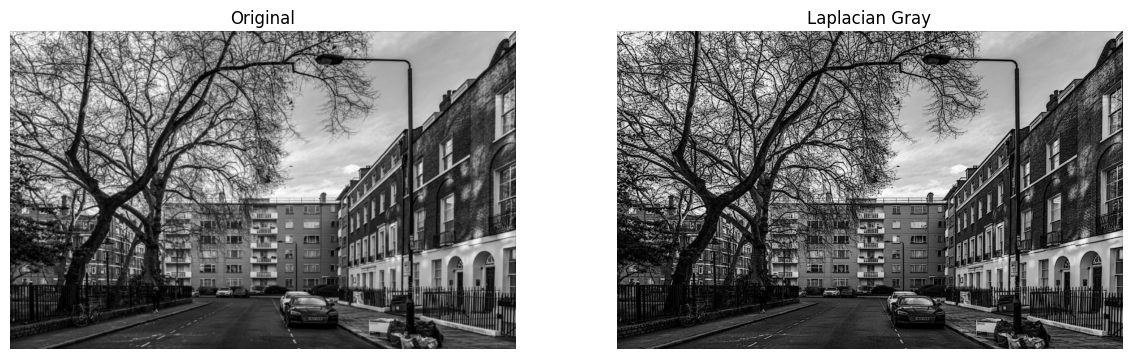

In [10]:
# Laplacian sharpening grayscale
plt.figure(figsize=(30,15))
plt.subplot(1,4,1); plt.imshow(img_gray, cmap="gray"); plt.title("Original"); plt.axis("off")
plt.subplot(1,4,2); plt.imshow(laplacian_gray, cmap="gray"); plt.title("Laplacian Gray"); plt.axis("off")
plt.show()

In [11]:
# Load gambar RGB
img_rgb = Image.open('./nature.jpeg')
img_rgb = np.array(img_rgb)
img_rgb = convolution_image(img_rgb, mean_kernel)

# Menerapkan jenis filtering
mean_rgb       = convolution_image(img_rgb, mean_kernel)
gaussian_rgb   = convolution_image(img_rgb, gaussian_kernel)
sobelx_rgb     = convolution_image(img_rgb, sobelx_kernel)
sobely_rgb     = convolution_image(img_rgb, sobely_kernel)
sharpened_rgb  = convolution_image(img_rgb, sharpen_kernel)
laplacian_rgb  = laplacian_sharpen(img_rgb, laplacian_kernel, 2)

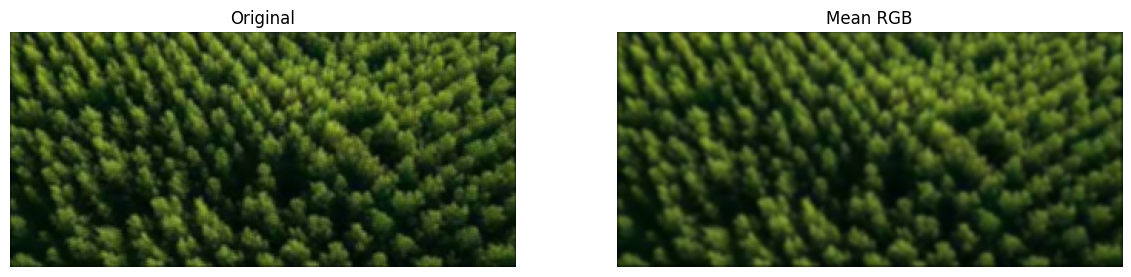

In [12]:
# Mean filtering RGB
plt.figure(figsize=(30,15))
plt.subplot(1,4,1); plt.imshow(img_rgb); plt.title("Original"); plt.axis("off")
plt.subplot(1,4,2); plt.imshow(mean_rgb); plt.title("Mean RGB"); plt.axis("off")
plt.show()

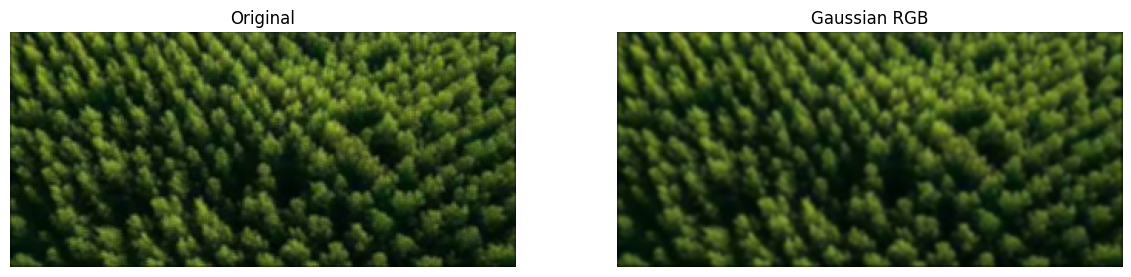

In [13]:
# Gaussian filtering RGB
plt.figure(figsize=(30,15))
plt.subplot(1,4,1); plt.imshow(img_rgb); plt.title("Original"); plt.axis("off")
plt.subplot(1,4,2); plt.imshow(gaussian_rgb); plt.title("Gaussian RGB"); plt.axis("off")
plt.show()

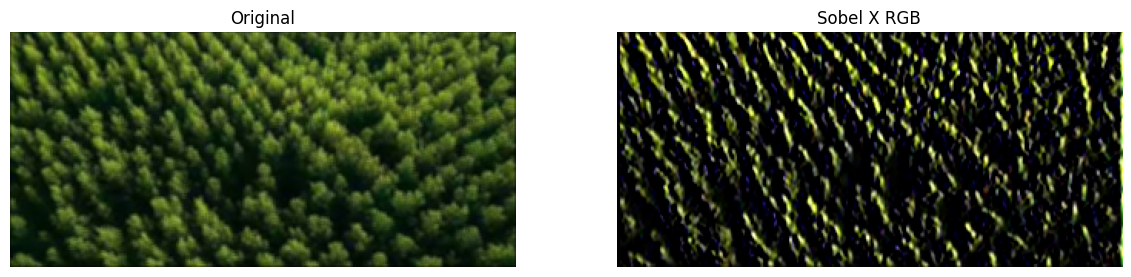

In [14]:
# Sobel X filtering RGB
plt.figure(figsize=(30,15))
plt.subplot(1,4,1); plt.imshow(img_rgb); plt.title("Original"); plt.axis("off")
plt.subplot(1,4,2); plt.imshow(sobelx_rgb); plt.title("Sobel X RGB"); plt.axis("off")
plt.show()

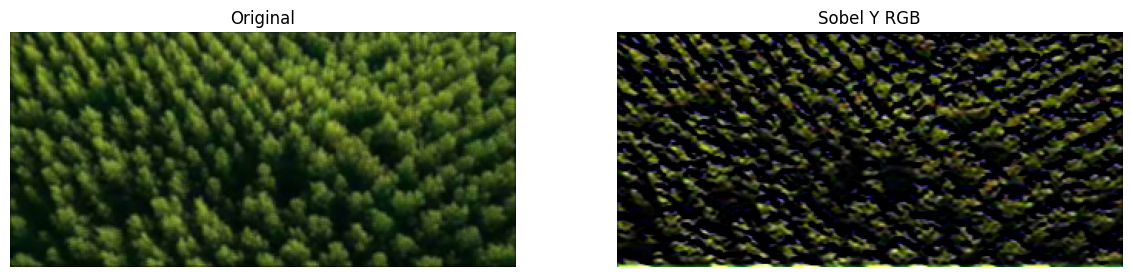

In [15]:
# Sobel Y filtering RGB
plt.figure(figsize=(30,15))
plt.subplot(1,4,1); plt.imshow(img_rgb); plt.title("Original"); plt.axis("off")
plt.subplot(1,4,2); plt.imshow(sobely_rgb); plt.title("Sobel Y RGB"); plt.axis("off")
plt.show()

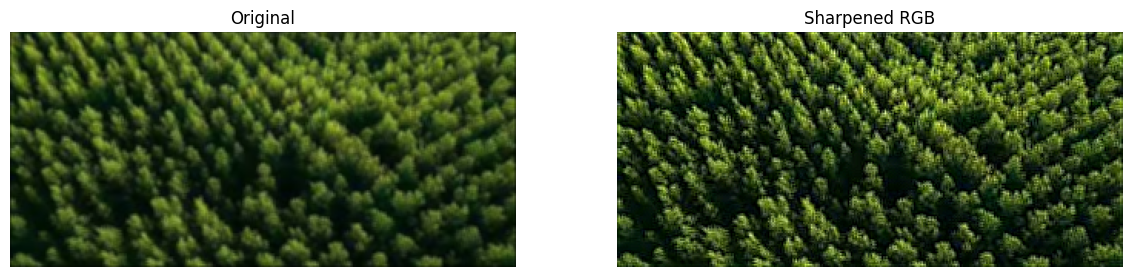

In [16]:
# Sharpening RGB
plt.figure(figsize=(30,15))
plt.subplot(1,4,1); plt.imshow(img_rgb); plt.title("Original"); plt.axis("off")
plt.subplot(1,4,2); plt.imshow(sharpened_rgb); plt.title("Sharpened RGB"); plt.axis("off")
plt.show()

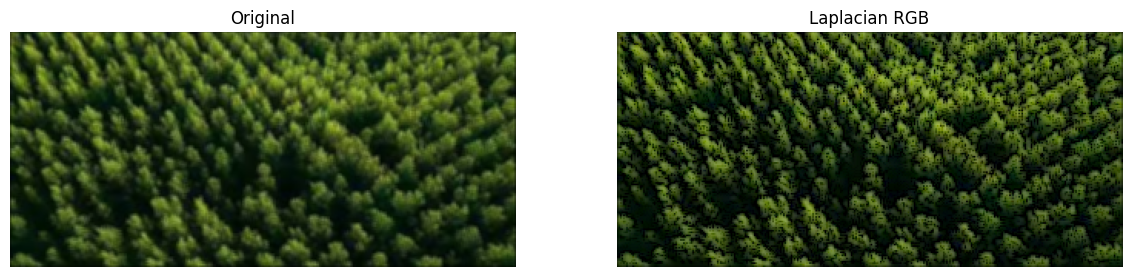

In [19]:
# Laplacian Sharpening RGB
plt.figure(figsize=(30,15))
plt.subplot(1,4,1); plt.imshow(img_rgb); plt.title("Original"); plt.axis("off")
plt.subplot(1,4,2); plt.imshow(laplacian_rgb); plt.title("Laplacian RGB"); plt.axis("off")
plt.show()

Skenario eksperimen :
Input gambar yang digunakan adalah gambar grayscale dan RGB yang telah diblur terlebih dahulu menggunakan mean filtering atau kernel mean dengan tujuan agar hasil sharpening dapat lebih terlihat perbedaannya.

Hasil dan diskusi :
Berdasarkan hasil eksperimen filtering, mean filtering dan gaussian lebih cocok digunakan ketika terdapat blur atau noise yang tersebar lebih merata pada suatu citra dimana gaussian lebih sedikit halus dibaningkan dengan mean filtering secara visualisasinya, tetapi pada hasil eksperimen gambar RGB, hasil sharpening biasa lebih baik dari segi visualnya. Namun, yang menjadi kekurangannya adalah detail gambar pada metode filtering ini menjadi lebih blur.

Pada Sobel X dan Y, lebih cocok digunakan dalam deteksi tepi untuk segmentasi atau feature extraction. Sharpening dengan metode biasa dan laplacian berhasil menghasilkan output yang lebih tajam. Sharpening dengan metode biasa lebih baik digunakan ketika tujuan sharpening adalah untuk meningkatkan kualitas visualnya, tetapi ketika tujuannya untuk mempertegas garis tepi, maka laplacian lebih tepat untuk digunakan. Hal tersebut dapat dilihat dengan lebih jelas pada eksperimen gambar RGB, dimana memiliki garis tepi yang lebih tegas pada tiap pohon dibandingka dengan metode sharpening biasa.

Pixel-based method lebih cocok digunakan ketika ingin mengubah gambar pada tingkatan piksel, seperti contrast dan thresholding. Spatial iltering lebih cocok digunakan ketika ingin memperbaiki kualitas visual dari suatu citra dimana spatial filtering ini bekerja dengan cara melibatkan piksel tetangganya. Spatial filtering ini cocok digunakan ketika ingin mengurangi noise, mempertajam citra, dan menonjolkan tepi.